In [196]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [197]:
%pip install pyjanitor

Note: you may need to restart the kernel to use updated packages.


In [198]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np           
import janitor   

In [199]:
%pip install scipy
%pip install pingouin
%pip install scikit-posthocs
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [200]:
import scipy.stats as st
import pingouin as pg
import scikit_posthocs as sp
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np   

plt.rcParams['figure.figsize'] = (4, 3)  

import warnings

warnings.simplefilter(category = FutureWarning, action = 'ignore')

In [201]:
data = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [203]:
dane = data.clean_names()
dane

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [204]:
dane.rename(columns= {"gender": "plec",
                      "person_id": "id",
                      "age":'wiek',
                      "occupation":"zawod",
                      "sleep_duration": "ilosc_snu",
                      "quality_of_sleep":"jakosc_snu",
                      "physical_activity_level":"poziom_aktywnosci_fizycznej",
                      "stress_level":"poziom_stresu",
                      "bmi_category":"bmi",
                      "blood_pressure":"cisnienie_krwi",
                      "heart_rate":"tetno",
                      "daily_steps":"dzienna_ilosc_krokow",
                      "sleep_disorder":"zaburzenia_snu"}, inplace=True)
dane

,id,plec,wiek,zawod,ilosc_snu,jakosc_snu,poziom_aktywnosci_fizycznej,poziom_stresu,bmi,cisnienie_krwi,tetno,dzienna_ilosc_krokow,zaburzenia_snu
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [205]:
dane.remove_empty()
dane = dane.replace({None: np.nan})
dane.dropna()
dane

,id,plec,wiek,zawod,ilosc_snu,jakosc_snu,poziom_aktywnosci_fizycznej,poziom_stresu,bmi,cisnienie_krwi,tetno,dzienna_ilosc_krokow,zaburzenia_snu
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [206]:
dane['plec'] = dane['plec'].str.upper(
                            ).str.strip(
                            ).replace({
                                       'FEMALE'   : 'K',
                                       "MALE": "M"})
dane['plec'].value_counts(dropna = False)

plec
M    189
K    185
Name: count, dtype: int64

In [207]:
dane['bmi'] = dane['bmi'].str.lower(
                            ).str.strip(
                            ).replace({'normal'     : 'w normie',
                                       'overweight'    : 'powyzej normy',
                                       'obese' : 'powyzej normy',
                                       'normal weight'   : 'w normie'})
dane['bmi'].value_counts(dropna = False)

bmi
w normie         216
powyzej normy    158
Name: count, dtype: int64

In [208]:
dane['zaburzenia_snu'] = dane['zaburzenia_snu'].str.lower(
                            ).str.strip(
                            ).replace({
                                       'sleep apnea'    : 'bezdech senny',
                                       })
dane['zaburzenia_snu'].value_counts(dropna = False)

zaburzenia_snu
NaN              219
bezdech senny     78
insomnia          77
Name: count, dtype: int64

In [209]:
dane['zawod'] = dane['zawod'].str.lower(
                            ).str.strip(
                            ).replace({'nurse'     : 'pielegniarka/arz',
                                       'doctor'    : 'lekarz',
                                       'engineer' : 'inzynier',
                                       'lawyer'   : 'prawnik',
                                       "teacher": "nauczyciel/ka",
                                       "accountant": "ksiegowy/wa",
                                       "salesperson":"sprzedawca",
                                       "scientist":"naukowiec",
                                       "sales representative": "przedstawiciel handlowy"})
dane['zawod'].value_counts(dropna = False) 

zawod
pielegniarka/arz           73
lekarz                     71
inzynier                   63
prawnik                    47
nauczyciel/ka              40
ksiegowy/wa                37
sprzedawca                 32
naukowiec                   4
software engineer           4
przedstawiciel handlowy     2
manager                     1
Name: count, dtype: int64

In [210]:
dane.dtypes

id                               int64
plec                            object
wiek                             int64
zawod                           object
ilosc_snu                      float64
jakosc_snu                       int64
poziom_aktywnosci_fizycznej      int64
poziom_stresu                    int64
bmi                             object
cisnienie_krwi                  object
tetno                            int64
dzienna_ilosc_krokow             int64
zaburzenia_snu                  object
dtype: object

In [211]:
dane['ilosc_snu'] = dane['ilosc_snu'].round().astype(int)

In [212]:
dane

,id,plec,wiek,zawod,ilosc_snu,jakosc_snu,poziom_aktywnosci_fizycznej,poziom_stresu,bmi,cisnienie_krwi,tetno,dzienna_ilosc_krokow,zaburzenia_snu
0,1,M,27,software engineer,6,6,42,6,powyzej normy,126/83,77,4200,NaN
1,2,M,28,lekarz,6,6,60,8,w normie,125/80,75,10000,NaN
2,3,M,28,lekarz,6,6,60,8,w normie,125/80,75,10000,NaN
3,4,M,28,przedstawiciel handlowy,6,4,30,8,powyzej normy,140/90,85,3000,bezdech senny
4,5,M,28,przedstawiciel handlowy,6,4,30,8,powyzej normy,140/90,85,3000,bezdech senny
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,K,59,pielegniarka/arz,8,9,75,3,powyzej normy,140/95,68,7000,bezdech senny
370,371,K,59,pielegniarka/arz,8,9,75,3,powyzej normy,140/95,68,7000,bezdech senny
371,372,K,59,pielegniarka/arz,8,9,75,3,powyzej normy,140/95,68,7000,bezdech senny
372,373,K,59,pielegniarka/arz,8,9,75,3,powyzej normy,140/95,68,7000,bezdech senny


In [213]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           374 non-null    int64 
 1   plec                         374 non-null    object
 2   wiek                         374 non-null    int64 
 3   zawod                        374 non-null    object
 4   ilosc_snu                    374 non-null    int64 
 5   jakosc_snu                   374 non-null    int64 
 6   poziom_aktywnosci_fizycznej  374 non-null    int64 
 7   poziom_stresu                374 non-null    int64 
 8   bmi                          374 non-null    object
 9   cisnienie_krwi               374 non-null    object
 10  tetno                        374 non-null    int64 
 11  dzienna_ilosc_krokow         374 non-null    int64 
 12  zaburzenia_snu               155 non-null    object
dtypes: int64(8), object(5)
memory usage

In [214]:
#pytanie 1 -> Czy kobiety i mezczyzni różnią się poziomem stresu?
#H0: Kobiety i mezczyzni nie roznia sie poziomem stresu
#H1: Kobiety i mezczyzni roznia sie poziomem stresu
#wykres slupkowy skumulowany (nominalna i porzadkowa)
#test istotnosci roznic dla danych niezaleznych -> nieparametryczny (bo dane sa nominalne i porzadkowe) manna whitneya

In [215]:
#dopisanie do danych zmiennej porządkowej w postaci rangowej
dane['stres_rank'] = dane['poziom_stresu'].factorize(sort = True)[0] + 1

,count,mean,std,min,25%,50%,75%,max
plec,,,,,,,,
K,185.0,2.675676,1.911835,1.0,1.0,2.0,4.0,6.0
M,189.0,4.079365,1.300183,1.0,3.0,4.0,5.0,6.0


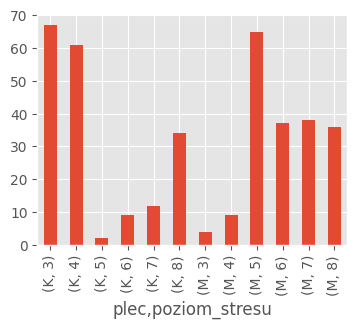

In [216]:
#rozkład
dane.groupby('plec')['poziom_stresu'].value_counts(sort = False).plot(kind = 'bar')
dane.groupby('plec')['stres_rank'].describe()

In [217]:
#test docelowy
#utworzenie podserii zmiennej porządkowej w postaci rangowej
stres_k = dane.loc[dane['plec'] == 'K', 'stres_rank']
stres_m   = dane.loc[dane['plec'] == 'M',   'stres_rank']

In [218]:
#test statystyczny
st.mannwhitneyu(stres_k, stres_m)

MannwhitneyuResult(statistic=np.float64(9034.0), pvalue=np.float64(2.2929416314698734e-16))

In [ ]:
#docelowy test statystyczny
pg.mwu(stres_k, stres_m)

,U-val,alternative,p-val,RBC,CLES
MWU,9034.0,two-sided,2.292942e-16,-0.483255,0.258373


In [219]:
#wykres - tabela krzyzowa zmiennych
wykres_pyt1 = pd.crosstab(dane['poziom_stresu'], dane['plec']    # jako pierwsza zmienna porządkowa, jako druga zmienna nominalna    
                                  #).apply(lambda x: x / x.sum()                         # gdy chcemy na osi y odsetki obserwacji dla porównania grup (raczej do słupkowego grupowanego)
                                  ).reset_index()     
wykres_pyt1

plec,poziom_stresu,K,M
0,3,67,4
1,4,61,9
2,5,2,65
3,6,9,37
4,7,12,38
5,8,34,36


In [220]:
#uporzadkowanie wartosci
wykres1_stres = ["3","4","5","6","7","8"]

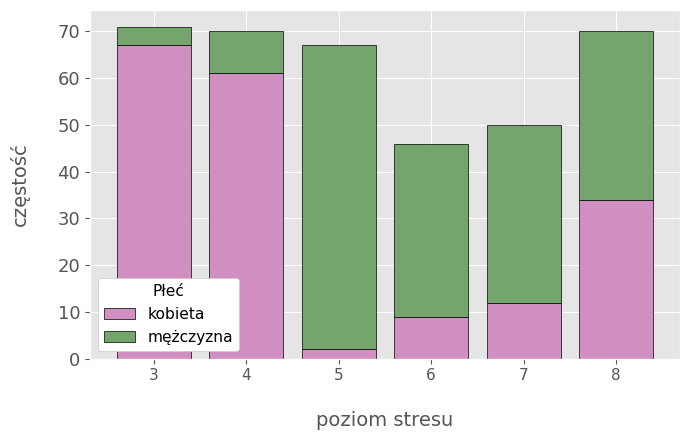

In [299]:
#wykres
plt.figure(figsize = (7, 4.5))


plt.bar(wykres1_stres, wykres_pyt1['K'],    
        color     = "#D18FC1",
        edgecolor = 'black',
        label     = 'kobieta')                   
plt.bar(wykres1_stres, wykres_pyt1['M'], 
        color     = "#74A56C",
        edgecolor = 'black',
        label     = 'mężczyzna',
        bottom    = wykres_pyt1['K'])


plt.legend(title          = 'Płeć',
           title_fontsize = 11.2,
           fontsize       = 11.2,
           facecolor      = 'white',
           framealpha     = 1,                    
           loc            = 'lower left')

plt.xlabel('\npoziom stresu', size = 14) 
plt.ylabel('częstość\n',                        size = 14)

plt.xticks(size = 11)
plt.yticks(size = 13)

plt.tight_layout()
plt.savefig('wykres1.png', dpi = 300)
plt.show()

In [ ]:
#pytanie 2 -> Czy kobiety i mężczyźni różnią się ilością snu?
#nominalna i ilosciowa
#H0: Kobiety i mezczyzni nie roznia sie iloscia snu
#H1: Kobiety i mezczyzni roznia sie iloscia snu
#nominalna i ilosciowa -> wykres słupkowy z agregacją
#test istotnosci roznic dla danych niezaleznych -> nieparametryczny, test manna-whitneya

,count,mean,std,min,25%,50%,75%,max
plec,,,,,,,,
K,185.0,7.108108,0.807027,6.0,6.0,7.0,8.0,8.0
M,189.0,7.015873,0.878079,6.0,6.0,7.0,8.0,8.0


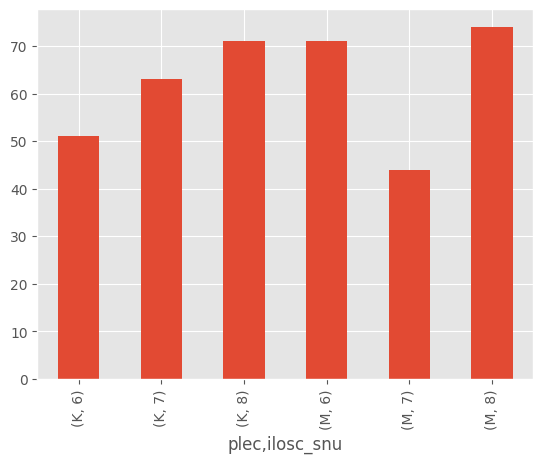

In [ ]:
#rozkład zmiennej w grupach
dane.groupby('plec')['ilosc_snu'].value_counts(sort = False).plot(kind = 'bar')
dane.groupby('plec')['ilosc_snu'].describe()

In [ ]:
#test wstepny - shapiro wilk
pg.normality(smf.ols('ilosc_snu ~ C(plec)', data = dane).fit().resid)
#test nie jest parametryczny

,W,pval,normal
0,0.810337,1.237286e-20,False


In [ ]:
ilosc_k = dane.loc[dane['plec'] == 'K', 'ilosc_snu']
ilosc_m   = dane.loc[dane['plec'] == 'M',   'ilosc_snu']

In [ ]:
#test docelowy Manna Whitneya
st.mannwhitneyu(ilosc_k, ilosc_m)

MannwhitneyuResult(statistic=np.float64(18461.5), pvalue=np.float64(0.31932670222207926))

In [301]:
#docelowy test statystyczny
pg.mwu(ilosc_k, ilosc_m)

,U-val,alternative,p-val,RBC,CLES
MWU,18461.5,two-sided,0.319327,0.055999,0.527999


In [ ]:
#wykres - srednia i odchylenie
wykres_pyt2 = dane.groupby('plec')['ilosc_snu'].agg(['mean', 'std'])
wykres_pyt2

,mean,std
plec,,
K,7.108108,0.807027
M,7.015873,0.878079


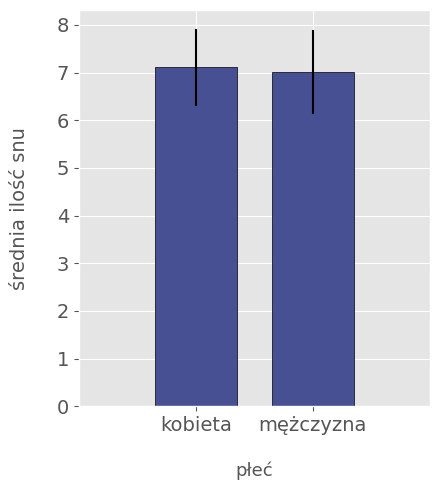

In [293]:
#wlasciwy wykres
plt.figure(figsize = (4.5, 5))


plt.bar(['kobieta', 'mężczyzna'], wykres_pyt2['mean'],
        yerr      = wykres_pyt2['std'],
        width     = 0.7,
        color     = "#485094ff",
        edgecolor = 'black')


plt.xlabel('\npłeć',    size = 13)                      
plt.ylabel('średnia ilość snu\n', size = 14)

plt.xticks(size = 14)
plt.yticks(size = 14)

plt.xlim(-1, 2)

plt.tight_layout()
plt.savefig('wykres2.png', dpi = 300)
plt.show()

In [ ]:
#pytanie 3 -> Czy między wskaźnikami ilości snu i poziomem aktywności fizycznej istnieje związek?
#dane ilosciowe
#H0: korelacja między wskaźnikami jest równa 0
#H1: korelacja między wskaźnikami jest różna od 0
#test istotnosci wspolczynnika korelacji Spearmana
#wykres rozrzutu

In [ ]:
#test wstepny Henze-Zinklera
pg.multivariate_normality(dane[['ilosc_snu', 'poziom_aktywnosci_fizycznej']])
#rozklad nie jest normalny -> test nieparametryczny = wskaznik korealacji Spearmana

HZResults(hz=np.float64(73.71287916229372), pval=np.float64(1.7622221771533816e-55), normal=False)

,count,mean,std,min,25%,50%,75%,max
ilosc_snu,,,,,,,,
6,122.0,52.360656,23.530555,30.0,30.0,45.0,90.0,90.0
7,107.0,54.831776,8.161675,30.0,45.0,60.0,60.0,70.0
8,145.0,68.103448,21.818928,30.0,60.0,75.0,85.0,90.0


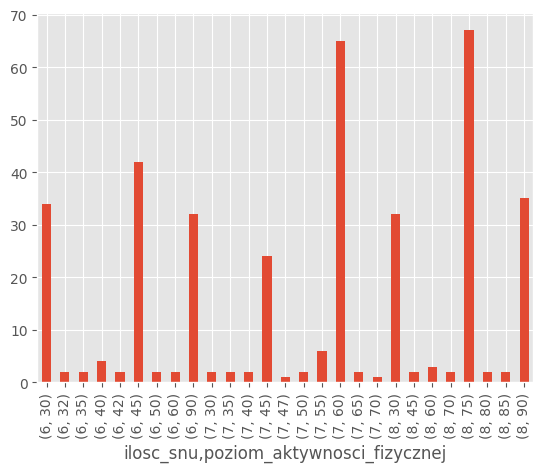

In [ ]:
#rozkład
dane.groupby('ilosc_snu')['poziom_aktywnosci_fizycznej'].value_counts(sort = False).plot(kind = 'bar')
dane.groupby('ilosc_snu')['poziom_aktywnosci_fizycznej'].describe()

In [ ]:
#test docelowy korelacji spearmana
pg.corr(dane['ilosc_snu'], dane['poziom_aktywnosci_fizycznej'], method = 'spearman')

,n,r,CI95%,p-val,power
spearman,374,0.32753,"[0.23, 0.42]",8.420924e-11,0.999998


In [244]:
#statystyki opisowe zmiennych - wykres
dane[['ilosc_snu', 'poziom_aktywnosci_fizycznej']].describe()

,ilosc_snu,poziom_aktywnosci_fizycznej
count,374.000000,374.000000
mean,7.061497,59.171123
std,0.843816,20.830804
min,6.000000,30.000000
25%,6.000000,45.000000
50%,7.000000,60.000000
75%,8.000000,75.000000
max,8.000000,90.000000


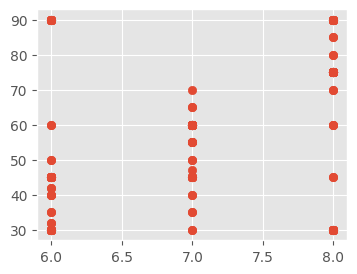

In [246]:
#wykres surowy
plt.scatter(dane['ilosc_snu'], dane['poziom_aktywnosci_fizycznej'])
plt.show()

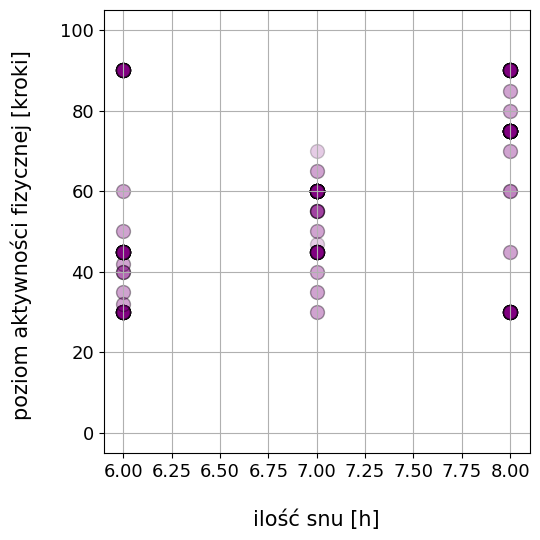

In [248]:
#wykres wlasciwy
plt.style.use('default')

plt.figure(figsize = (5.5, 5.5)) 
plt.grid(True) #dodaje siatkę - łatwiej odczytać punkty


plt.scatter(dane['ilosc_snu'], dane['poziom_aktywnosci_fizycznej'],      # podajemy całe zmienne
            color     = 'purple',
            edgecolor = 'black',
            alpha     = 0.2, #przezroczystość
            s         = 100)                                  # rozmiar punktów


plt.xlabel('\nilość snu [h]', size = 15)
plt.ylabel('poziom aktywności fizycznej [kroki] \n',   size = 15)

plt.xticks(size = 13)
plt.yticks(size = 13)

plt.ylim(-5, 105)

plt.tight_layout()
plt.savefig('wykres3.png', dpi = 300)
plt.show()

plt.style.use('ggplot')

In [ ]:
#pytanie 4 -> Czy między wskaźnikami poziomu stresu i jakości snu istnieje związek?
#zmienne porzadkowe
#H0: korelacja między wskaźnikami jest równa 0
#H1: korelacja między wskaźnikami jest różna od 0
#test istotnosci wspolczynnika korelacji Spearmana
#wykres słupkowy

In [302]:
#statystyki opisowe zmiennych - tabela
dane[['poziom_stresu', 'jakosc_snu']].describe()

,poziom_stresu,jakosc_snu
count,374.000000,374.000000
mean,5.385027,7.312834
std,1.774526,1.196956
min,3.000000,4.000000
25%,4.000000,6.000000
50%,5.000000,7.000000
75%,7.000000,8.000000
max,8.000000,9.000000


In [ ]:
#test wstepny - Henze-Zinklera
pg.multivariate_normality(dane[['poziom_stresu', 'jakosc_snu']])
#rozklad nie jest normalny -> test nieparametryczny = wskaznik korealacji Spearmana

HZResults(hz=np.float64(132527079.50142048), pval=np.float64(0.0), normal=False)

In [ ]:
#dopisanie do danych zmiennych porządkowych w postaci rangowej
dane['sen_rank'] = dane['jakosc_snu'].factorize(sort = True)[0] + 1
dane['stres_rank'] = dane['poziom_stresu'].factorize(sort = True)[0] + 1 

,count,mean,std,min,25%,50%,75%,max
sen_rank,,,,,,,,
1,5.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
2,7.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
3,105.0,5.580952,0.568076,4.0,5.0,6.0,6.0,6.0
4,77.0,3.350649,1.035758,2.0,2.0,4.0,4.0,5.0
5,109.0,2.605505,0.593457,1.0,2.0,3.0,3.0,4.0
6,71.0,1.028169,0.166633,1.0,1.0,1.0,1.0,2.0


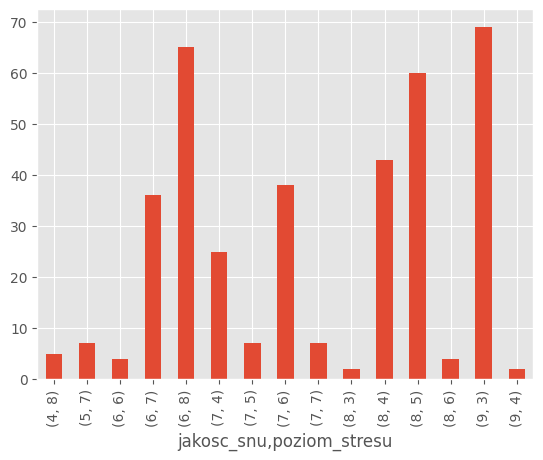

In [ ]:
#rozkład
dane.groupby('jakosc_snu')['poziom_stresu'].value_counts(sort = False).plot(kind = 'bar')
dane.groupby('sen_rank')['stres_rank'].describe()

In [ ]:
#wlasciwy test - korelacji spearmana
pg.corr(dane['poziom_stresu'], dane['jakosc_snu'], method = 'spearman')

,n,r,CI95%,p-val,power
spearman,374,-0.908147,"[-0.92, -0.89]",9.707430e-143,1.0


In [ ]:
#tabela krzyżowa - poziom stresu
wykres_pyt4_stres = dane["poziom_stresu"].value_counts(sort=False)
wykres_pyt4_stres

poziom_stresu
6    46
8    70
7    50
4    70
3    71
5    67
Name: count, dtype: int64

In [ ]:
#tabela krzyżowa - jakość snu
wykres_pyt4_sen = dane["jakosc_snu"].value_counts(sort=False)
wykres_pyt4_sen

jakosc_snu
6    105
4      5
7     77
5      7
8    109
9     71
Name: count, dtype: int64

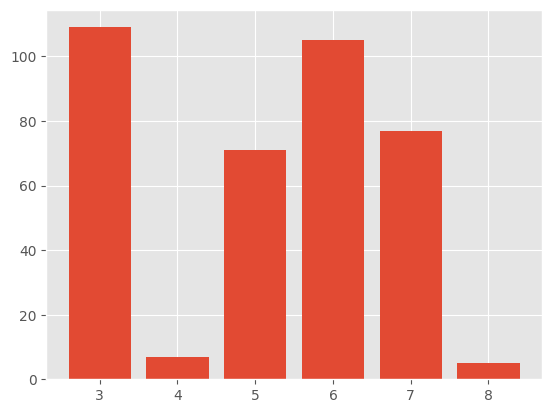

In [ ]:
#wykres słupkowy surowy - oś x jako poziom stresu
plt.bar(wykres_pyt4_stres.index, wykres_pyt4_sen)
plt.show()

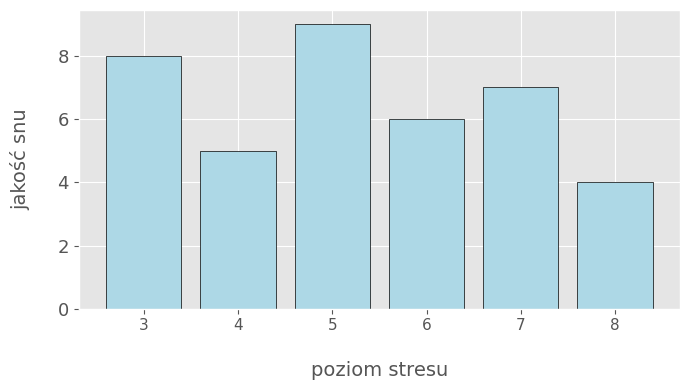

In [291]:
#wykres właściwy
plt.figure(figsize = (7, 4))


plt.bar(wykres_pyt4_stres.index, wykres_pyt4_sen.index,
        color     = "lightblue",
        edgecolor = 'black')


plt.xlabel('\npoziom stresu', size = 14)                      
plt.ylabel('jakość snu\n',                        size = 14)

plt.xticks(size = 11)
plt.yticks(size = 13)

plt.tight_layout()
plt.savefig('wykres4.png', dpi = 300)
plt.show()

In [ ]:
#pytanie 5 -> Czy osoby z odmiennym bmi różnią się poziomem aktywnosci fizycznej?
#H0: Osoby o odmiennym BMI nie roznia sie poziomem aktywnosci fizycznej
#H1: Osoby o odmiennym BMI roznia sie poziomem aktywnosci fizycznej
#ilosciowa i nominalna -> wykres slupkowy
#test istotnosci roznic dla danych niezaleznych -> nieparametryczny, test manna-whitneya
#wykres z agregacja

In [ ]:
#test wstepny Shapiro Wilka
pg.normality(smf.ols('poziom_aktywnosci_fizycznej ~ C(bmi)', data = dane).fit().resid)
#rozklad nie jest normalny -> test nieparametryczny manna whitneya

,W,pval,normal
0,0.906321,1.918428e-14,False


,count,mean,std,min,25%,50%,75%,max
bmi,,,,,,,,
powyzej normy,158.0,60.841772,19.924866,30.0,45.0,45.0,75.0,90.0
w normie,216.0,57.949074,21.432473,30.0,30.0,60.0,75.0,90.0


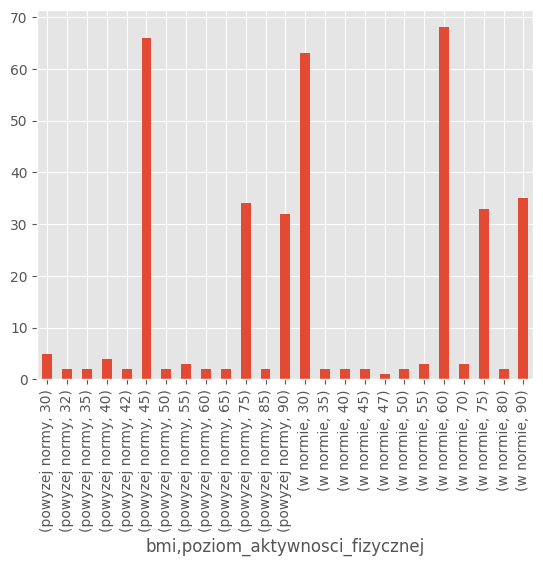

In [ ]:
#rozkład zmiennej w grupach
dane.groupby('bmi')['poziom_aktywnosci_fizycznej'].value_counts(sort = False).plot(kind = 'bar')
dane.groupby('bmi')['poziom_aktywnosci_fizycznej'].describe()

In [ ]:
aktywnosc_bmiok = dane.loc[dane['bmi'] == 'w normie', 'aktywnosc_rank']
aktywnosc_bminok   = dane.loc[dane['bmi'] == 'powyzej normy',   'aktywnosc_rank']

In [ ]:
#test docelowy Manna Whitneya
st.mannwhitneyu(aktywnosc_bmiok, aktywnosc_bminok)

MannwhitneyuResult(statistic=np.float64(15725.0), pvalue=np.float64(0.1881594359720402))

In [303]:
#docelowy test statystyczny
pg.mwu(aktywnosc_bminok, aktywnosc_bmiok)

,U-val,alternative,p-val,RBC,CLES
MWU,18403.0,two-sided,0.188159,0.078469,0.539235


In [ ]:
#wykres - srednia i odchylenie
wykres_pyt5 = dane.groupby('bmi')['poziom_aktywnosci_fizycznej'].agg(['mean', 'std'])
wykres_pyt5

,mean,std
bmi,,
powyzej normy,60.841772,19.924866
w normie,57.949074,21.432473


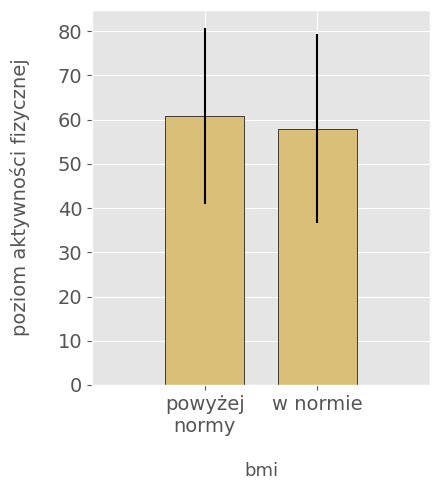

In [290]:
#wlasciwy wykres
plt.figure(figsize = (4.5, 5))


plt.bar(['powyżej\nnormy', 'w normie'], wykres_pyt5['mean'],
        yerr      = wykres_pyt5['std'],
        width     = 0.7,
        color     = "#dabf78",
        edgecolor = 'black')


plt.xlabel('\nbmi',    size = 13)                      
plt.ylabel('poziom aktywności fizycznej\n', size = 14)

plt.xticks(size = 14)
plt.yticks(size = 14)

plt.xlim(-1, 2)

plt.tight_layout()
plt.savefig('wykres5.png', dpi = 300)
plt.show()